Example notebook to generate Fig. 9 (DESI EDR TFR) for the EDR TF paper.

In [1]:
import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt

# Data

## Galaxies

In [2]:
hdul = fits.open('fig9_data.fits')

gals = hdul[1].data

hdul.close()

In [3]:
dwarf_boolean = gals['DWARF']

## Calibrated TFR

In [4]:
hdul = fits.open('../Fig8/fig8_data.fits')

hdr = hdul[0].header
mcmc_samples = hdul[0].data

hdul.close()

In [5]:
logV0 = hdr['LOG_V0']

slope = np.median(mcmc_samples[0])
ZP = np.median(mcmc_samples[2])
sig = np.median(mcmc_samples[3:], axis=1)

# Plot

In [6]:
logv = np.linspace(-1, 3, 100)

In [7]:
# Create calibrated TFR line
absmag = slope*(logv - logV0) + ZP

In [8]:
# Define line perpendicular to fit
logV_n17 = (-17 - ZP)/slope + logV0
b_perp = -17 + (logV_n17 - logV0)/slope

yvals_perp = -(logv - logV0)/slope + b_perp

In [9]:
# Calculate the uncertainties in the calibrated TFR
slopes = mcmc_samples[0]
ZPs = mcmc_samples[2]

N_samples = len(slopes)

lines = []

for i in range(N_samples):
    lines.append(slopes[i]*(logv - logV0) + ZPs[i])
    
lines_array = np.asarray(lines)
line_err = np.nanpercentile(lines_array, [16 ,84], axis=0)

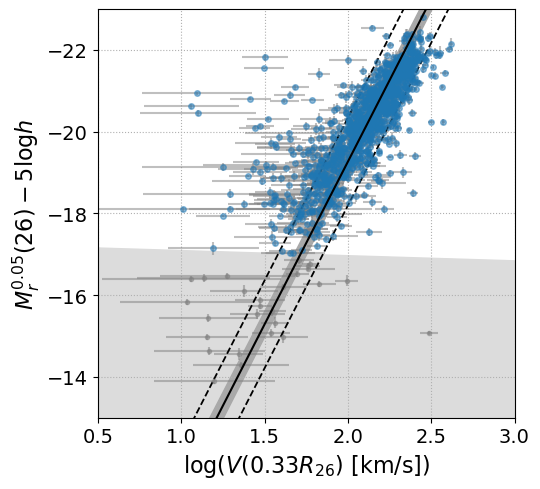

In [10]:
plt.figure(figsize=(5.5,5), tight_layout=True)

plt.grid(ls=':')

plt.fill_between(logv, yvals_perp, -12, color='gainsboro')

plt.fill_between(logv, line_err[0], line_err[1], color='darkgray')

plt.errorbar(np.log10(gals['VROT'][~dwarf_boolean]), 
             gals['R_ABSMAG'][~dwarf_boolean], 
             xerr=0.434*gals['VROT_ERR'][~dwarf_boolean]/gals['VROT'][~dwarf_boolean],
             yerr=gals['R_ABSMAG_ERR'][~dwarf_boolean], 
             fmt='o', 
             markersize=4, 
             alpha=0.5, 
             ecolor='gray')
plt.errorbar(np.log10(gals['VROT'][dwarf_boolean]), 
             gals['R_ABSMAG'][dwarf_boolean], 
             xerr=0.434*gals['VROT_ERR'][dwarf_boolean]/gals['VROT'][dwarf_boolean],
             yerr=gals['R_ABSMAG_ERR'][dwarf_boolean], 
             fmt='.',
             color='gray',
             alpha=0.5, 
             ecolor='gray')

plt.plot(logv, absmag, 'k', zorder=3)
plt.plot(logv, absmag - sig, c="k", marker="None", ls="--", lw=1.3)
plt.plot(logv, absmag + sig, c="k", marker="None", ls="--", lw=1.3)

plt.xlim([0.5, 3])
plt.ylim([-13, -23])

plt.xlabel('log($V(0.33R_{26})$ [km/s])', fontsize=16)
plt.ylabel('$M_r^{0.05} (26) - 5$log$h$', fontsize=16);

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=14);